In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import prettytable as pt
import pprint
def read_json_file(filename):
    with open(filename, 'r') as fp:
        data = fp.readlines()
    if len(data) == 1:
        data = json.loads(data[0])
    else:
        data = [json.loads(line) for line in data]
    return data 


In [2]:
data_dir="../RSA/results"
filename="search.json"
search_results =read_json_file(os.path.join(data_dir,filename))
filename="clone.json"
clone_results =read_json_file(os.path.join(data_dir,filename))
filename="code_sum.json"
code_sum_results =read_json_file(os.path.join(data_dir,filename))
filename="code_gen.json"
code_gen_results =read_json_file(os.path.join(data_dir,filename))
filename="code_completion.json"
code_completion_results =read_json_file(os.path.join(data_dir,filename))

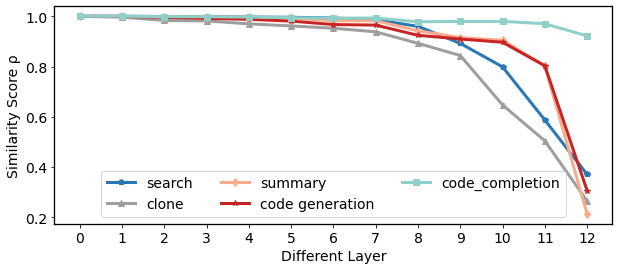

In [3]:
os.makedirs("figures",exist_ok=True)
x =  np.arange(13)
x_text =  [0,1,2,3,4,5,6,7,8,9,10,11,12]
fontsize=14
linewidth=3
markersize=6
# plt.figure(figsize=(10, 4))

search = [ v[0]  for k,v in  search_results .items() ]
clone = [ v[0]  for k,v in  clone_results.items() ]
summary = [ v[0]  for k,v in  code_sum_results.items() ]
code_gen = [ v[0]  for k,v in  code_gen_results.items() ]
code_completion = [ v[0]  for k,v in  code_completion_results.items() ]
markers = ['p','s','o','*','^','o','s']

fig, ax = plt.subplots(1, 1,figsize=(10, 4))

ax.plot(x, search , label='search',marker='p' ,linewidth=linewidth,color='#2878b5', markersize=markersize)
ax.plot(x, clone, label='clone',marker='^', linewidth=linewidth,color='#9E9E9E', markersize=markersize)
ax.plot(x, summary, label='summary',marker='d', linewidth=linewidth,color='#f8ac8c', markersize=markersize)
ax.plot(x, code_gen, label='code generation',marker='*', linewidth=linewidth, color="#c82423",markersize=markersize)
ax.plot(x, code_completion, label='code_completion',marker='s', linewidth=linewidth, color="#8ECFC9",markersize=markersize)
scale_value="1.3"
ax.spines['bottom'].set_linewidth(scale_value)
ax.spines['left'].set_linewidth(scale_value)
ax.spines['top'].set_linewidth(scale_value)
ax.spines['right'].set_linewidth(scale_value)

# ax.set_xticklabels(fontsize=fontsize)
ax.set_xticks(x,fontsize=fontsize)
ax.set_xticklabels(x_text,fontsize=fontsize)
ax.set_yticks([0.2,0.4,0.6,0.8,1.0],fontsize=fontsize)
ax.set_yticklabels([0.2,0.4,0.6,0.8,1.0],fontsize=fontsize)

ax.set_ylabel("Similarity Score ρ", fontsize=fontsize)
ax.set_xlabel("Different Layer", fontsize=fontsize)
ax.legend(loc = 'lower center', fontsize=fontsize,ncol=3)

figure_name="figures/RSA_Results.pdf"  
plt.savefig(figure_name,dpi=1000,format="pdf", bbox_inches='tight')